In [5]:
import time
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
from datetime import datetime
import numpy as np
import pandas as pd
import os
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import matplotlib.pyplot as plt 
import seaborn as sns


# Load DataSet and Data Dictionary

In [6]:
# main_dir = 
Dataset_name = 'TechLabsDataset.csv' 
DataDictionary_name = 'TechLabsDataset_Dictionary.csv'

Dataset = pd.read_csv(os.path.join('./Data/',Dataset_name), index_col = 0)
DataDictionary = pd.read_csv(os.path.join('./Data/',DataDictionary_name), index_col = 0)

Dataset.head(15)

,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang
0,Caretrex warehousing & logistics,Logistics service,51.593721,5.073492,Tilburg,5.0,2.0,HHpDM,0.0,4.0,2 years ago,2022-09-24,5.0,NaN,NaN
1,Caretrex warehousing & logistics,Logistics service,51.593721,5.073492,Tilburg,5.0,2.0,dYFWx,0.0,1.0,5 years ago,2022-09-24,5.0,NaN,NaN
2,FEFA Logistics,Trucking company,51.480074,5.446764,Eindhoven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,Pp1)c,0.0,5.0,a year ago,2022-09-24,5.0,Best employer ever. Worked there for approxima...,ENG
4,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,*nk1l,0.0,2.0,a year ago,2022-09-24,5.0,better place with very good people everything ...,ENG
5,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,69lOZ,0.0,3.0,4 years ago,2022-09-24,5.0,Nice,ENG
6,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,&7jv4,0.0,27.0,3 months ago,2022-09-24,5.0,Good firm. The staff are very welcoming and f...,NOT_ENG
7,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,K2#6M,1.0,24.0,4 months ago,2022-09-24,5.0,"Top company, and coffee, so recommended\n\n",NOT_ENG
8,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,xJ(Zc,0.0,1.0,a year ago,2022-09-24,5.0,A very neat company with professional people ...,NOT_ENG
9,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,QGfwK,1.0,36.0,4 months ago,2022-09-24,5.0,Friendly staff and quickly released\n\n,NOT_ENG


In [52]:
#MISSING VALUES!!!

Dataset[Dataset["stars_num"].isna()]
# 139 missing rows in "stars_num"
Dataset[Dataset["n_reviews_num"].isna()]
#159 missing values in n_reviews_num
Dataset[Dataset["encoded_user"].isna()]
#169 missing values in "encoded_user"
Dataset[Dataset["local_guide"].isna()]
#844 missing values in "local_guide"
Dataset[Dataset["clean_other_review_num"].isna()]
#939 missing values in "clean_other_review_num"
Dataset[Dataset["published_date"].isna()]
#169 missing values in "published_date"
Dataset[Dataset["today_date"].isna()]
#169 missing values in today_date
Dataset[Dataset["review_EN"].isna()]
#4682 missing values in review_EN
Dataset[Dataset["original_lang"].isna()]
#4682 missing values in original_lang





,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang
2531,010 Logistics,Trucking company,51.875805,4.536542,Rotterdam,5.0,21.0,z0GeS,0.0,1.0,a year ago,2022-09-24,5.0,NaN,NaN
4215,EA logistics & moving,Moving company,51.437782,5.396024,Eindhoven,5.0,29.0,X2C7m,0.0,1.0,2 months ago,2022-09-24,5.0,I had a great time with Hajro and José during...,NOT_ENG
4213,EA logistics & moving,Moving company,51.437782,5.396024,Eindhoven,5.0,29.0,Ct#0E,0.0,3.0,5 months ago,2022-09-24,5.0,Very friendly and hard workers,ENG
4212,EA logistics & moving,Moving company,51.437782,5.396024,Eindhoven,5.0,29.0,lp!C8,0.0,6.0,9 months ago,2022-09-24,5.0,Very professional service. The move was very s...,ENG
4211,EA logistics & moving,Moving company,51.437782,5.396024,Eindhoven,5.0,29.0,^9hl9,0.0,2.0,9 months ago,2022-09-24,5.0,Everything went really smooth with our moving ...,ENG
2532,010 Logistics,Trucking company,51.875805,4.536542,Rotterdam,5.0,21.0,ejir@,0.0,13.0,11 months ago,2022-09-24,5.0,NaN,NaN
2530,010 Logistics,Trucking company,51.875805,4.536542,Rotterdam,5.0,21.0,X0PVi,0.0,2.0,10 months ago,2022-09-24,5.0,NaN,NaN
2529,010 Logistics,Trucking company,51.875805,4.536542,Rotterdam,5.0,21.0,#mhfz,NaN,NaN,4 months ago,2022-09-24,5.0,NaN,NaN
4210,EA logistics & moving,Moving company,51.437782,5.396024,Eindhoven,5.0,29.0,Yz)1Z,0.0,5.0,8 months ago,2022-09-24,5.0,Very professional job and we are very happy wi...,ENG
4209,EA logistics & moving,Moving company,51.437782,5.396024,Eindhoven,5.0,29.0,GPc1a,1.0,123.0,8 months ago,2022-09-24,5.0,The guys moved everything from my old house to...,ENG


## The best companies
These are the highest rated companies in the bizz

In [9]:
Dataset_unique_titles = Dataset["name"].unique()
Dataset_unique_titles

array(['Caretrex warehousing & logistics', 'FEFA Logistics',
       'Dekkers Transport Holland', 'Cotra Logistics Solutions BV',
       'Leeuw Shipping & Logistics G de', 'Dedicated Logistics Services',
       'Schenker Logistics Nederland', 'Milloa Logistics',
       'Bos Logistics Schiphol', 'Allroad Logistics',
       'ARCO Transport & Logistics B.V.', 'Berserik logistics B.V.',
       'Sensible Logistics', 'BTS Transport B.V.', 'LB-Logistics',
       'M4 Transport & Logistics', 'KS Project Logistics',
       'Ontruck Nederland', 'Transport J.A. van Wanrooy BV',
       'Rus Cargo Logistics B.V.', 'Hiram transport',
       'Red Transport & Logistics', 'GVT Transport & Logistics Tilburg',
       'Logistics Company Tilburg B.V.', 'Base Logistics BV',
       'ID Logistics Benelux', 'DR Logistics BV', 'GMG Logistics',
       'ChainCargo', 'C. Express', 'Jan De Rijk Retail',
       'Thijssen Koeriers', 'Eurostars Logistics | Koeriersdiensten',
       'Archers Logistics', 'Elst Transport',

array(['010 Logistics', 'EA logistics & moving'], dtype=object)

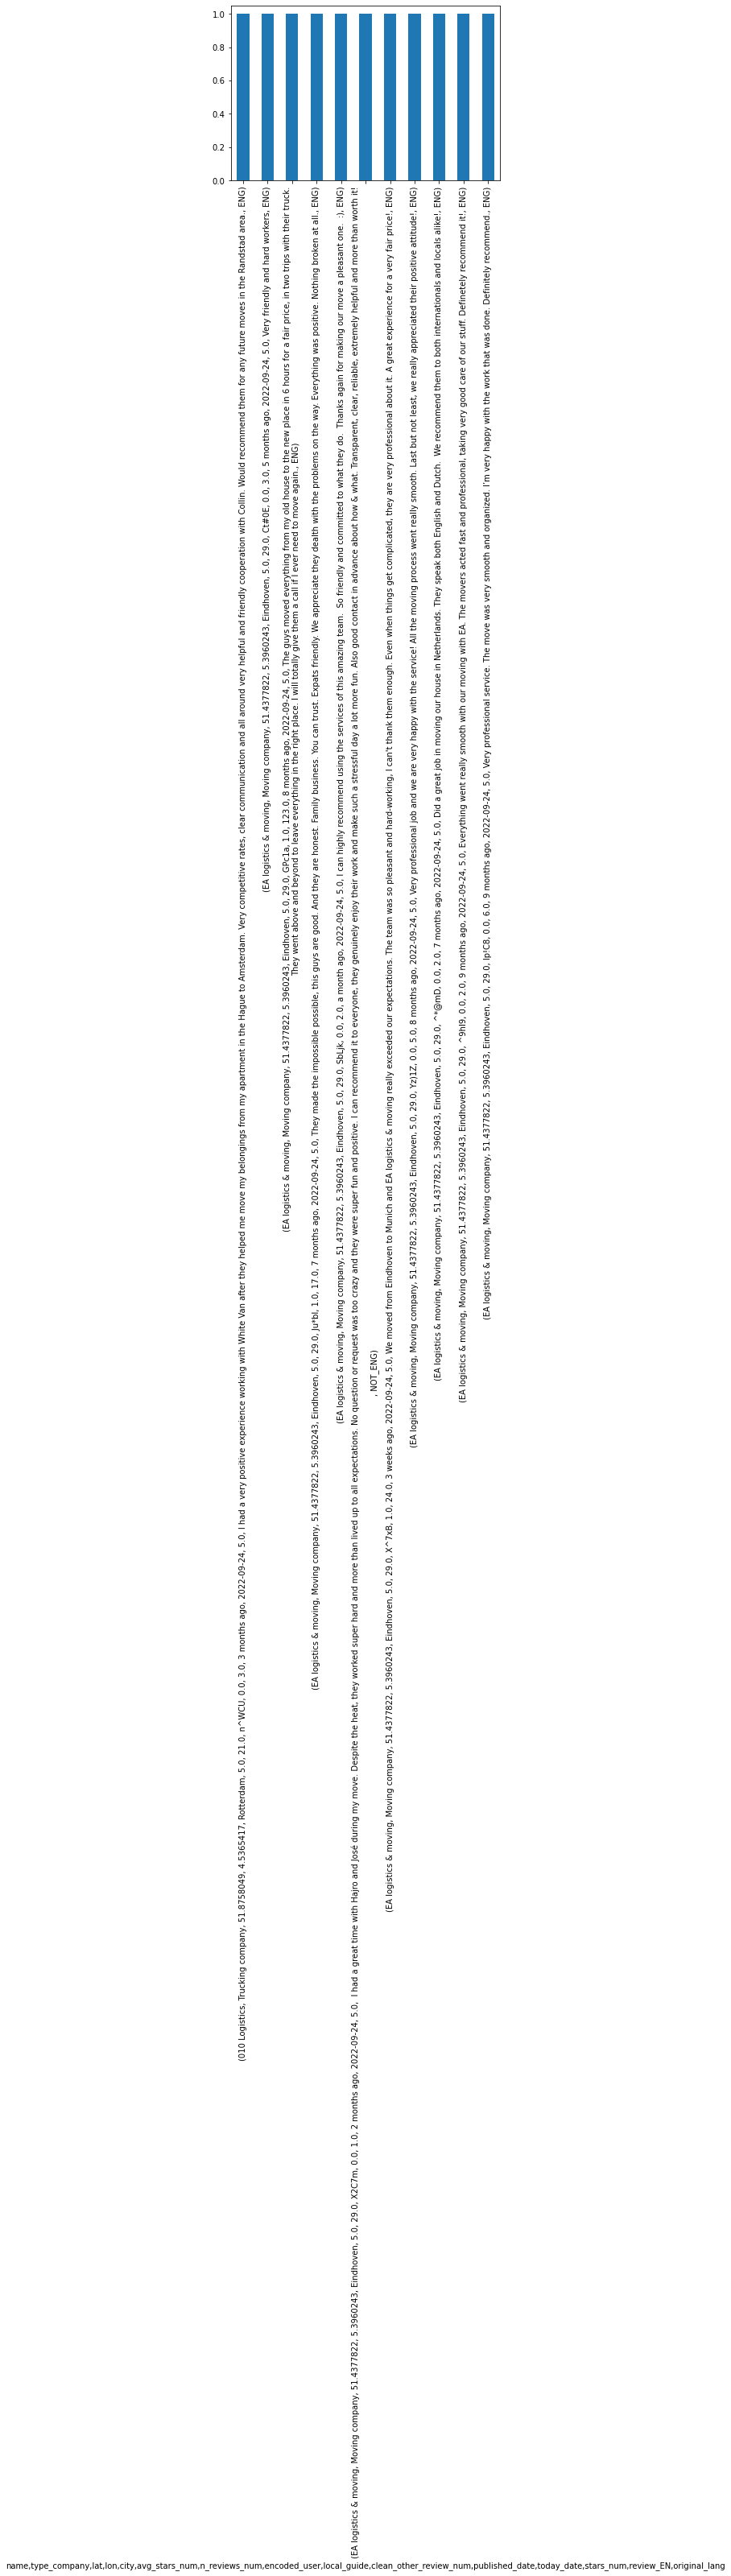

In [95]:
#GRAPHS
true_high_reviews.value_counts().plot(kind="bar")

#COMPANY RATINGS

#COMPANIES WITH LOWEST RATINGS [NUMBER OF REVIEWS NOT CONSIDERED]
Dataset.sort_values("stars_num").head()
#COMPANIES WITH HIGHEST RATINGS [NUMBER OF REVIEWS NOT CONSIDERED]
Dataset.sort_values("stars_num", ascending=False).head()

#COMPANIES WITH HIGHEST RATINGS
high_number_reviews = Dataset[(Dataset["n_reviews_num"] >= 10)]
true_high_reviews = high_number_reviews.sort_values("avg_stars_num",ascending=False).head(15)
true_high_reviews

#COMPANIES WITH HIGHEST RATINGS
true_low_reviews = high_number_reviews.sort_values("avg_stars_num").head(10)
true_low_reviews
true_high_reviews["name"].unique()